# **Sentiment Analysis**

Sentiment analysis is a natural language processing (NLP) technique that evaluates customer sentiment—positive, negative, or neutral—expressed in reviews, social media posts, or support messages about products, services, or brands. Leveraging sentiment analysis provides insights into customer preferences, identifies potential issues, and enhances marketing strategies.

Main benefits of sentiment analysis:

- **Product Improvement**: Identifies common customer/user likes/dislikes in reviews, guiding product enhancements and highlighting popular features.
- **Enhanced Customer Service**: Flags negative sentiments for priority response, enabling faster support and higher satisfaction.
- **Targeted Marketing**: Allows for personalized product recommendations and promotions based on customer sentiment, increasing engagement and conversion rates.
- **Brand Reputation Monitoring**: Tracks public perception across platforms to address issues promptly, while also gaining insights from competitor sentiment data.
- **Demand Prediction**: Detects sentiment trends that help forecast product demand, assisting in better inventory and supply chain management.
- **Fake Review Detection**: Recognizes extreme sentiments and patterns indicative of spam, helping maintain review quality and customer trust.

## **Hugging Face 🤗 in NLP**

Hugging Face Spaces is a platform for hosting and sharing machine learning demos. It allows users to create and showcase interactive applications built with models from the Model Hub. In the Model Hub users can share and discover pre-trained models for various tasks and languages. Also, the Model Hub allows easy downloading and fine-tuning of models, facilitating rapid experimentation and development. Hugging face focus on open-source collaboration, user-friendly tools, and community engagement that has established it as a central hub for machine learning innovation.

**Key Components**

1. **Transformers Library**: provides pre-trained models for various NLP tasks (e.g., text classification, named entity recognition, translation). The models an be fine-tuned on custom datasets with minimal code using the `Trainer` API. Also, it is Compatible with TensorFlow and PyTorch, enabling easy model deployment in various environments.
2. **Datasets Library**: Is facilitates efficient loading, processing, and preprocessing of large datasets. Provides a unified interface for over 25,000 datasets, supporting data manipulation with minimal overhead. Besides that, supports various data formats including CSV, JSON, and text files.
3. **Model Hub**: Hosts thousands of pre-trained models uploaded by the community, available for immediate use via `from_pretrained()`. Each model is versioned and includes metadata (e.g., task type, training dataset, license) to assist users in selection. 
4. **Transformers Pipeline**: Provides an easy-to-use interface for performing complex NLP tasks in just a few lines of code. Pre-configured pipelines for tasks such as sentiment analysis, question answering, and summarization (e.g., `pipeline("sentiment-analysis")`).
5. **Spaces**: Users can host their models and applications, promoting collaboration and feedback.

In [3]:
from transformers import pipeline # pipeline allows to execute the model in a single line of code in a simple way

In [5]:
# Select a model trained in English
sentiment_classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device=0) # device=0 is for gpu usage

In [ ]:
# Test model with positive and negative samples
positive_test = sentiment_classifier('I love this product. It is very useful') # positive with a high score
negative_test = sentiment_classifier('Very ugly') # negative with a high score

In [38]:
print(
    f"The first example contains a {positive_test[0]['label']} sentiment "
    f"with a score of {positive_test[0]['score']:.4f}\n"
    f"and the second example contains a {negative_test[0]['label']} sentiment "
    f"with a score of {negative_test[0]['score']:.4f}"
)

The first example contains a POSITIVE sentiment with a score of 0.9999
and the second example contains a NEGATIVE sentiment with a score of 0.9998


## **Sentiment Analysis in pt-br**: [pysentimiento](https://huggingface.co/pysentimiento/bertweet-pt-sentiment)

Model trained for polarity detection in Portuguese. Base model is BERTabaporu, a RoBERTa model trained in Portuguese tweets.

> Uses POS, NEG, NEU labels.

In [25]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="pt")

analyzer.predict("isto é muito lindo")
# returns AnalyzerOutput(output=POS, probas={POS: 0.992, NEG: 0.007, NEU: 0.002})

AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.007, NEG: 0.002})

In [26]:
analyzer.predict('''
A fritadeira é sensacional, muito além do que imaginava. É linda, super funcional e muito fácil de manusear. Fácil de limpar e potente. Super recomendo.
''') # POS

AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002})

In [27]:
analyzer.predict('''
Após poucos meses de uso a carcaça de aço escovado começou a oxidar,
demonstrando a baixa qualidade de proteção. Fora esse detalhe, o produto cumpre o prometido.
''') # NEU

AnalyzerOutput(output=NEU, probas={NEU: 0.921, NEG: 0.065, POS: 0.014})

In [28]:
analyzer.predict('''
Em menos de 1 ano parou de funcionar, enviei para assistência técnica por estar na garantia, trocaram o motor, passou a ficar menos potente e não durou 2 utilizações.
Isso se repetiu várias vezes, até que desisti de ficar levando lá e queimando de novo em seguida, vi outros clientes com o mesmo problema. Não comprem!!
''') # NEG

AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.042, POS: 0.015})

In [29]:
# Data from e-commerce
import pandas as pd

df = pd.read_csv('../dados/resenhas.csv')
df.head(3)

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."


In [31]:
predict_results = analyzer.predict(df['Resenha'])
predict_results[:10]

Map: 100%|██████████| 36/36 [00:00<00:00, 2304.60 examples/s]


[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}),
 AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003})]

In [32]:
sentiments = []

for result in predict_results:
    sentiments.append(result.output)

In [34]:
df['Sentimento'] = sentiments

In [36]:
df.head(4)

,ID,Resenha,Sentimento
0,24,"A fritadeira é sensacional, muito além do que ...",POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS
2,865,"Muito funcional, prática e moderna.",POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG


In [37]:
df['Sentimento'].value_counts()

Sentimento
NEG    19
POS    13
NEU     4
Name: count, dtype: int64

In [41]:
import plotly.express as px

df_sent = df.groupby('Sentimento').size().reset_index(name='Contagem Sentimento')

fig = px.bar(df_sent, x='Sentimento', y='Contagem Sentimento',
             title='Contagem de Resenhas por Sentimento')

fig.show()

In [43]:
# Sentiment analysis allows to use WordCloud which brings the most frequent words and the mais idea
# for better representativeness words with low semantic value (stopwords) will be removed
import nltk 
from nltk.corpus import stopwords

nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/alina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
list(portuguese_stopwords)[:15]

['estou',
 'aquele',
 'fomos',
 'for',
 'está',
 'no',
 'houverá',
 'hão',
 'teremos',
 'tenho',
 'o',
 'houvessem',
 'seu',
 'estávamos',
 'fosse']

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(text, text_column, sentiment):
    # Filter reviews based on the specified sentiment
    sentiment_text = text.query(f"Sentimento == '{sentiment}'")[text_column]

    # Combine all the reviews into a single string
    all_text = " ".join(sentiment_text)

    # Break the text into words and filtering with stopwords
    words = all_text.split()
    filtered_words = [word for word in words if word not in portuguese_stopwords]
    filtered_text = " ".join(filtered_words)

    # Create and show wordcloud
    word_cloud = WordCloud(width=800, height=500, max_words=50, colormap='PiYG').generate(filtered_text)
    plt.figure(figsize=(10, 7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off') 
    plt.show()

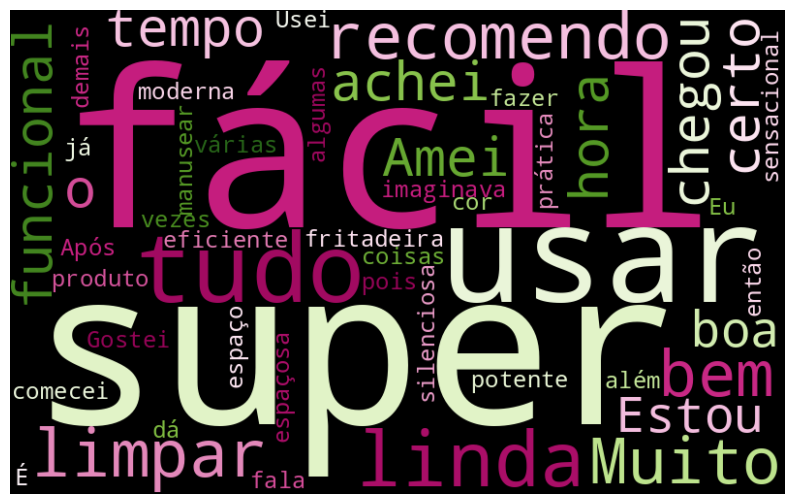

In [73]:
# wordcloud for positive 
word_cloud(df, 'Resenha', 'POS')

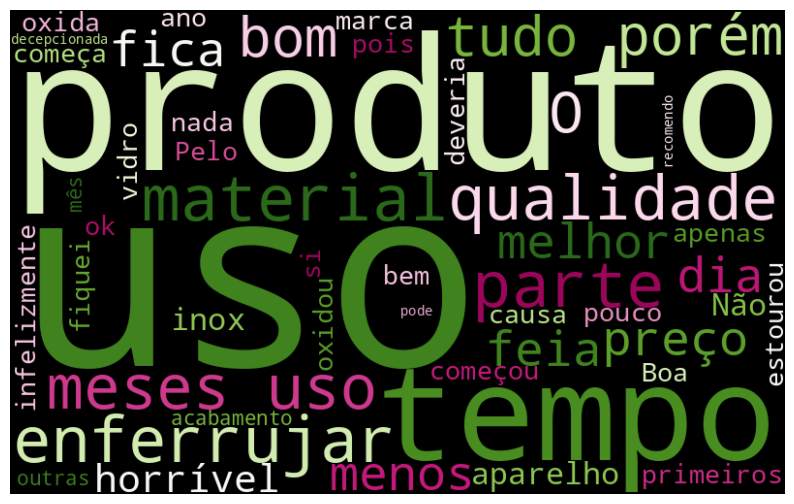

In [74]:
# wordcloud for negative 
word_cloud(df, 'Resenha', 'NEG')

> tempo de uso; inox; **talvez melhorar o material** para melhorar o produto e experiência do cliente.

time of use; stainless steel; **perhaps improve the material** to improve the product and customer experience.

In [75]:
# Storing positive data seperately
positive = df[df['Sentimento'] == 'POS']
positive_list = positive['Resenha'].tolist()

# Storing negative data seperately

negative = df[df['Sentimento'] == 'NEG']
negative_list = negative['Resenha'].tolist()

In [76]:
positive_list

['A fritadeira é sensacional, muito além do que imaginava. É linda, super funcional e muito fácil de manusear. Fácil de limpar e potente. Super recomendo.',
 'Após usar o produto, achei-o fácil e muito eficiente. Fácil de usar e de limpar.',
 'Muito funcional, prática e moderna.',
 'Eu comecei a usar e é bem espaçosa. Gostei pois dá para fazer várias coisas ao mesmo tempo.',
 'Usei ela algumas vezes já, muito silenciosa, linda demais a cor e o espaço então nem se fala.',
 'Superou minhas expectativas, por enquanto tudo certo, porém fiquei decepcionada com as datas de entregas que não estavam certas. Mas do resto tá tudo certo, chegou certinho e sem defeito.',
 'Chegou no prazo. Amei, é muito linda. Não vejo a hora de usar.',
 'Estou muito satisfeito com a negociação, recebimento tudo ok, e antes do esperado.',
 'Lindaaaa amei super indico',
 'Achei bem boa e super fácil de usar! Recomendo',
 'Muito boa! Me ajuda muito, não precisamos virar os alimentos, tudo fica muito gostoso. O único

In [85]:
def get_word_count(data):
    word_count = {}
    for sentence in data:
        words = sentence.split()  # Split each sentence into words
        for word in words:
            word = word.lower()  # Convert to lowercase for consistency
            if word not in portuguese_stopwords:  # Filter out stopwords
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    return word_count

# POS word counts
pos_word_counts = get_word_count(positive_list)
# NEG word counts
neg_word_counts = get_word_count(negative_list)

In [86]:
pos_word_counts = pd.DataFrame({"word":pos_word_counts.keys(),"count":pos_word_counts.values()})
pos_word_counts = pos_word_counts.sort_values(by = "count", ascending = False)

In [99]:
# Adding a color column for distinct coloring (dummy categorical data)
pos_word_counts["color"] = pos_word_counts["word"]

fig = px.bar(
    pos_word_counts[:10],  # Select top 10 words
    x="word",
    y="count",
    title="Word Frequency in Positive Data",
    labels={"word": "Word", "count": "Frequency"},
    color="color",  # Use color column to differentiate colors
    color_discrete_sequence=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", "#19D3F3", "#FF6692", "#B6E880", "#FF97FF", "#FECB52"]
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    width=800,
    height=500
)

fig.show()

In [103]:
# Adding a color column for distinct coloring 
pos_word_counts["color"] = pos_word_counts["word"]

fig = px.bar(
    pos_word_counts[:10],  # Select top 10 words
    x="word",
    y="count",
    title="Word Frequency in Positive Data",
    labels={"word": "Word", "count": "Frequency"},
    color="color",  # Use color column to differentiate colors
    color_discrete_sequence=["#19D3F3", "#FF6692", "#AB63FA", "#FFA15A", "#B6E880", "#FF97FF", "#FECB52", "#636EFA", "#EF553B", "#00CC96"]
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    width=800,
    height=500,
    showlegend=False
)

fig.show()

In [96]:
neg_word_counts = pd.DataFrame({"word":neg_word_counts.keys(),"count":neg_word_counts.values()})
neg_word_counts = neg_word_counts.sort_values(by = "count", ascending = False)

In [104]:
# Adding a color column for distinct coloring 
neg_word_counts["color"] = neg_word_counts["word"]

fig = px.bar(
    neg_word_counts[:10],  # Select top 10 words
    x="word",
    y="count",
    title="Word Frequency in Negative Data",
    labels={"word": "Word", "count": "Frequency"},
    color="color", 
    color_discrete_sequence=["#19D3F3", "#FF6692", "#AB63FA", "#FFA15A", "#B6E880", "#FF97FF", "#FECB52", "#636EFA", "#EF553B", "#00CC96"]
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    width=800,
    height=500,
    showlegend=False
)

fig.show()